In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import yaml

from Qatmosphere_2d import Atmsophere

%matplotlib inline

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


In [2]:
with open('/home/laclavere/Documents/Thesis/qubic/qubic/scripts/Atmosphere/params.yml', 'r') as file:
    params = yaml.safe_load(file)

In [3]:
atm = Atmsophere(params)

In [4]:
rho = atm.mean_water_vapor_density
print(rho)

57.066155735455155


In [5]:
delta_rho = atm.generate_spatial_fluctuations_2d()
print(type(delta_rho))

<class 'numpy.ndarray'>


In [6]:
atm.get_water_vapor_density_2d_map()

array([[57.06973553, 57.06628188, 57.0657516 , ..., 57.07473229,
        57.07250914, 57.07340671],
       [57.06727711, 57.06643267, 57.06674929, ..., 57.07276433,
        57.07322872, 57.07204795],
       [57.06906425, 57.06776712, 57.0655505 , ..., 57.07212223,
        57.07099269, 57.06984853],
       ...,
       [57.06835895, 57.06958943, 57.06980053, ..., 57.07356402,
        57.07430628, 57.07468667],
       [57.06871801, 57.06998316, 57.07011606, ..., 57.07599182,
        57.07473702, 57.07217898],
       [57.07117805, 57.0677408 , 57.06700297, ..., 57.07456326,
        57.0728388 , 57.07310616]])

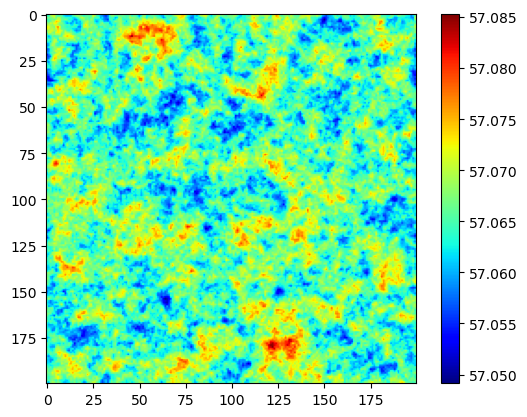

In [7]:
plt.imshow(atm.get_water_vapor_density_2d_map(), cmap='jet')
plt.colorbar()

In [8]:
map_temp = atm.maps()
frequencies = atm.integrated_absorption_spectrum()[1]

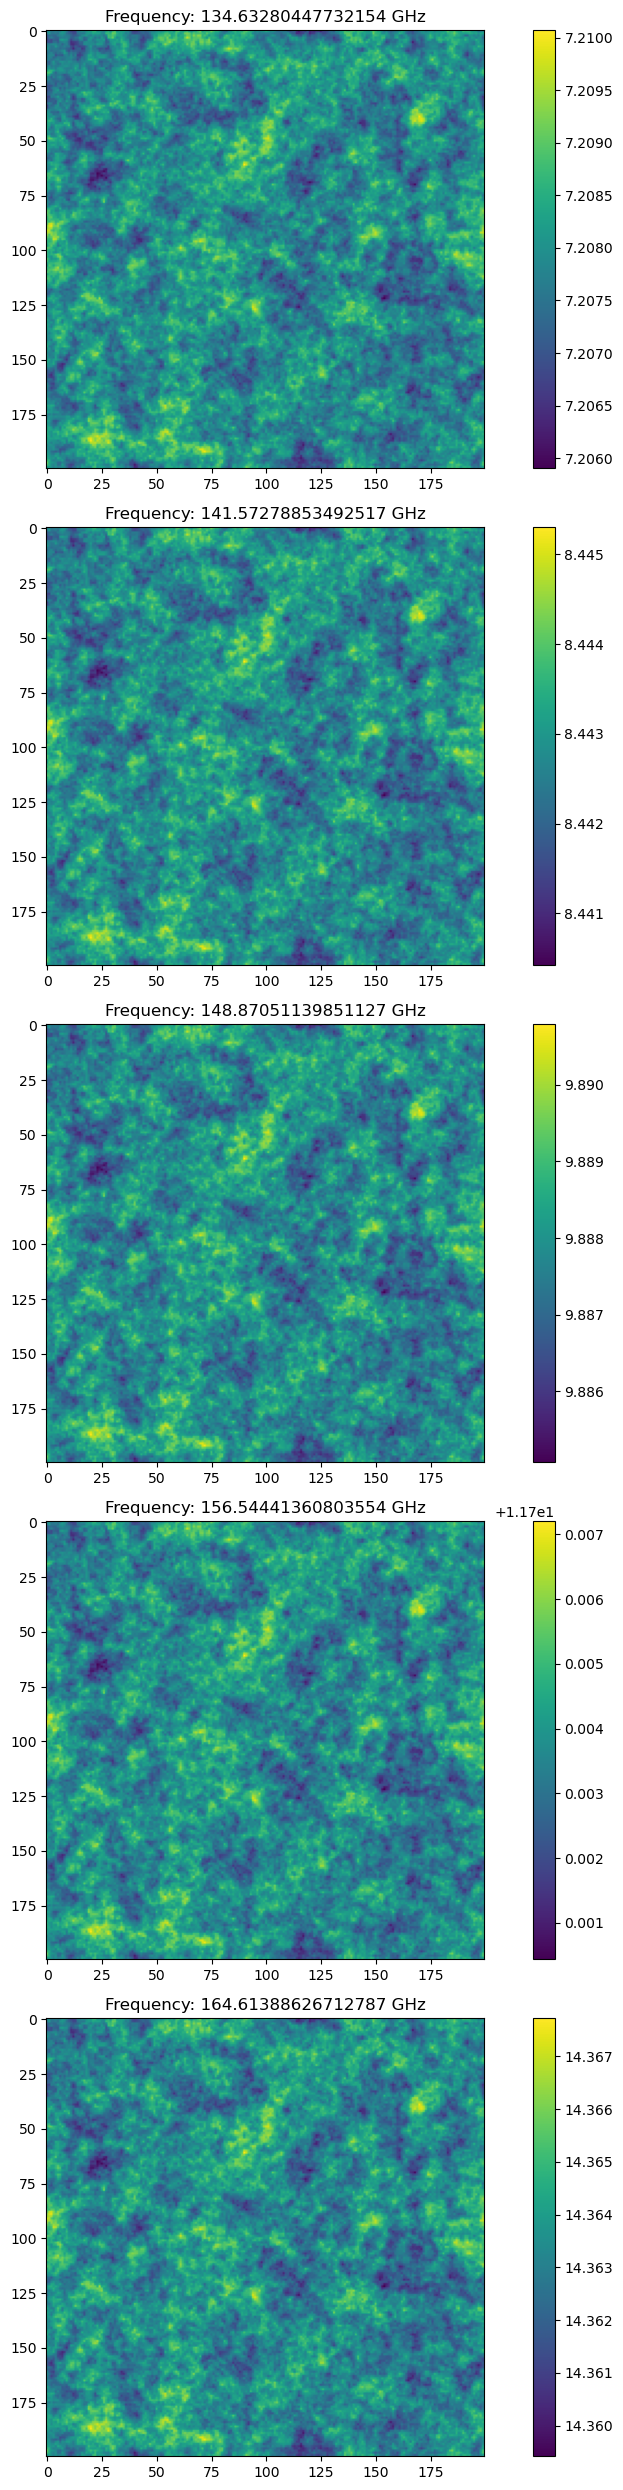

In [9]:
fig, axs = plt.subplots(len(frequencies), 1, figsize=(10, 5*len(frequencies)))
for i in range(len(frequencies)):
    im = axs[i].imshow(map_temp[i])
    plt.colorbar(im, ax=axs[i])
    axs[i].set_title(f'Frequency: {frequencies[i]} GHz')
plt.tight_layout()
plt.show()

In [ ]:
import healpy as hp

In [ ]:
maps = atm.get_maps_healpix()

In [ ]:
hp.mollview(maps[0])

In [ ]:
from lib.InstrumentModel.Qacquisition import QubicMultiAcquisitions

In [10]:
def get_dict(params, comm, key='in'):
    """QUBIC dictionary.

    Method to modify the qubic dictionary.

    Parameters
    ----------
    key : str, optional
        Can be "in" or "out".
        It is used to build respectively the instances to generate the TODs or to reconstruct the sky maps,
        by default "in".

    Returns
    -------
    dict_qubic: dict
        Modified QUBIC dictionary.

    """

    args = {
        "npointings": params["QUBIC"]["npointings"],
        "nf_recon": params["QUBIC"]["nrec"],
        "nf_sub": params["QUBIC"][f"nsub_{key}"],
        "nside": params["SKY"]["nside"],
        "MultiBand": True,
        "period": 1,
        "RA_center": params["SKY"]["RA_center"],
        "DEC_center": params["SKY"]["DEC_center"],
        "filter_nu": 150 * 1e9,
        "noiseless": False,
        "comm": comm,
        "dtheta": params["QUBIC"]["dtheta"],
        "nprocs_sampling": 1,
        "nprocs_instrument": comm.Get_size(),
        "photon_noise": True,
        "nhwp_angles": 3,
        #'effective_duration':3,
        "effective_duration150": 3,
        "effective_duration220": 3,
        "filter_relative_bandwidth": 0.25,
        "type_instrument": "two",
        "TemperatureAtmosphere150": None,
        "TemperatureAtmosphere220": None,
        "EmissivityAtmosphere150": None,
        "EmissivityAtmosphere220": None,
        "detector_nep": float(params["QUBIC"]["NOISE"]["detector_nep"]),
        "synthbeam_kmax": params["QUBIC"]["SYNTHBEAM"]["synthbeam_kmax"],
    }

    ### Get the default dictionary
    dictfilename = "dicts/pipeline_demo.dict"
    dict_qubic = qubic.lib.Qdictionary.qubicDict()
    dict_qubic.read_from_file(dictfilename)

    for i in args.keys():

        dict_qubic[str(i)] = args[i]

    return dict_qubic